# Psychoinformatics - Week 4 (Exercises)
by 吳由由 (b06902104@ntu.edu.tw)

## 1 Analyze what videos go viral? (6 points)

Please use <a href="https://developers.google.com/youtube/v3/code_samples/python">YouTube APIs</a> to carry out a data-driven or hypothesis-driven microstudy about the characteristics of viral videos.

You need to present, here in this notebook, AT LEAST two <b>statistical</b> figures or tables as supporting evidence for your arguments. Each of these figures/tables deserves 3 points.

### 我想要分析熱門的Pop 影片是不是受最多人喜愛，了解觀看人數、like、dislike的相關性

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from youtube_data import youtube_search

test = youtube_search("Pop")  #搜尋Pop

df = pd.DataFrame(data=test)
df1 = df[['title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']]
df1.columns = ['Title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId','channelId','categoryId']

In [2]:
import numpy as np
numeric_dtype = ['viewCount','commentCount','likeCount','dislikeCount','favoriteCount']
for i in numeric_dtype:
    df1[i] = df[i].astype(int)  #將蒐集到的資料轉成整數

fliter = (df1["viewCount"] >= 1000000)  #只保留點閱率超過一百萬的資料，不然圖表會太雜亂
Pop = df1[fliter]  
Pop = Pop.sort_values(ascending=False,by='viewCount')
Pop.head()


,Title,viewCount,channelTitle,commentCount,likeCount,dislikeCount,tags,favoriteCount,videoId,channelId,categoryId
5,TWICE「Candy Pop」Music Video,84435802,TWICE JAPAN OFFICIAL YouTube Channel,75917,803135,61817,"[TWICE, Candy Pop]",0,wQ_POfToaVY,UCCRb6nYKaT8tzLA8CwDdUtw,10
33,Pop That (Explicit Version),62538452,FrenchMontanaVEVO,47086,297776,26410,"[French, Montana, Pop, That, (Explicit, Versio...",0,X98HX5nbsCI,UCpmBpSoy6YQjcshNK6pSyIA,10
1,*NSYNC - Pop,41802884,NSYNCVEVO,10066,98457,5006,"[it's gonna be me, gone, n sync, acoustic, NSY...",0,TWZKw_MgUPI,UCsiSmzL5G7VS_pfKMXqmcjw,10
20,Músicas Internacionais Mais Tocadas 2017♫ Melh...,14170276,Obin Melhores Musicas,4712,120414,11818,"[musicas internacionais, musicas internacionai...",0,ZF-rdUqMffA,UC4_Y0qaA9iuPztxczD_CtRQ,10
40,Pop See Ko 2.0 - Koo Koo Kanga Roo | GoNoodle,14077487,GoNoodle | Get Moving,2100,29844,4216,"[kids, fun, kid friendly, kidfriendly, family ...",0,Pwn4beja1QE,UC2YBT7HYqCbbvzu3kKZ3wnw,27


### 以上是把蒐集到的資料依照觀看人數排序的圖表，入選的影片點閱率至少超過一百萬

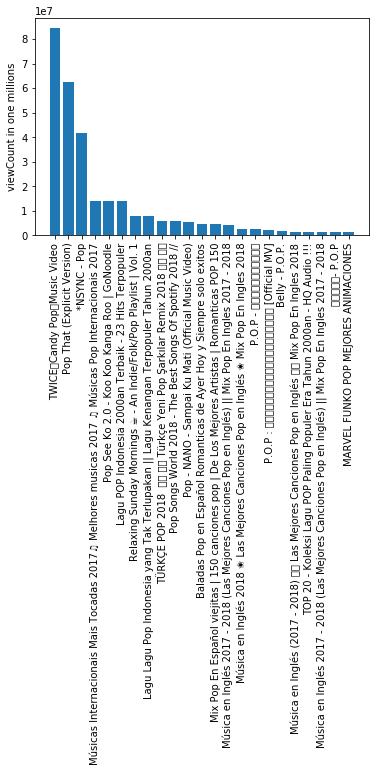

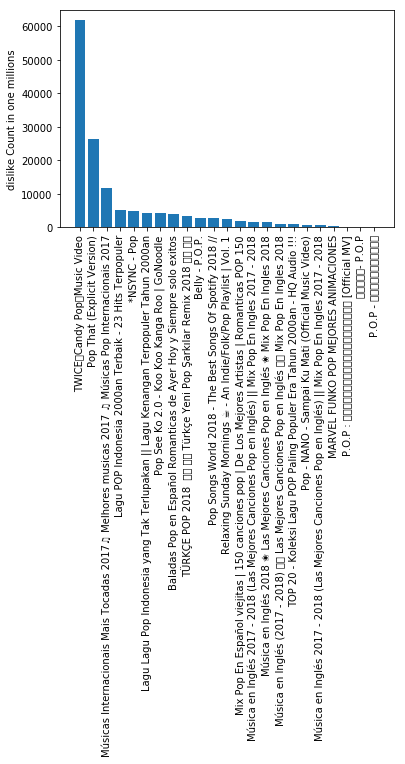

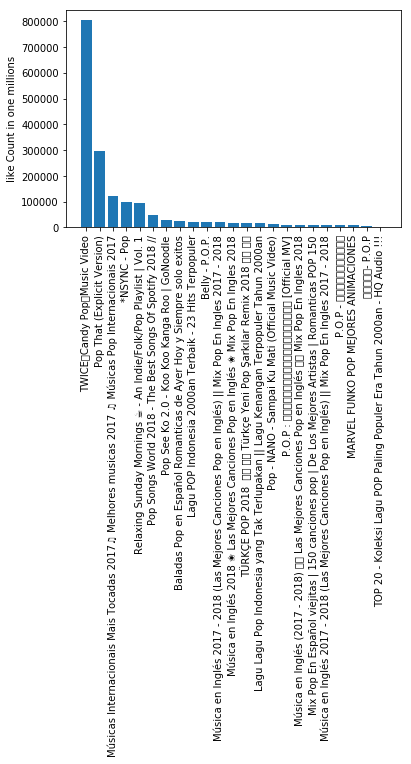

In [3]:
Pop = Pop.sort_values(ascending=False,by='viewCount')
plt.bar(range(Pop.shape[0]),Pop['viewCount'])
plt.xticks(range(Pop.shape[0]),Pop['Title'],rotation=90)
plt.ylabel('viewCount')

plt.show()

dislike = Pop.sort_values(ascending=False,by='dislikeCount')
plt.bar(range(dislike.shape[0]),dislike['dislikeCount'])
plt.xticks(range(dislike.shape[0]),dislike['Title'],rotation=90)
plt.ylabel('dislike Count')

plt.show()


like=Pop.sort_values(ascending=False,by='likeCount')
plt.bar(range(like.shape[0]),like['likeCount'])
plt.xticks(range(like.shape[0]),like['Title'],rotation=90)
plt.ylabel('like Count')

plt.show()


### 以上三張表格分別是點閱率、不喜歡、喜歡的柱狀圖


## 經過這次分析，我可以大略提出幾個結論

* 點閱率越高的影片越能得到評價，無論好壞

* 人們對Pop的喜好相當主觀，大家雖然都願意點進去看看，但那些點閱率高的影片喜歡和不喜歡的票數都很高

* 越受歡迎的影片同時也被越多人dislike

### Please submit this file to http://hpc.psy.ntu.edu.tw/info before noon next Wednesday.